In [153]:
import psycopg2
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

In [30]:
# Настройка стиля графиков
sns.set(
    font_scale=2,
    style='whitegrid',
    rc={'figure.figsize':(25,10)})

In [2]:
# Соединение с базой
con = psycopg2.connect(
    database='test',
    user='postgres',
    password='testpass',
    host='localhost',
    port='5432'
)
print("Database opened successfully")

Database opened successfully


In [4]:
# Создание таблицы
cur_1 = con.cursor()  
cur_1.execute('''CREATE TABLE public.stock (
    id int4 NOT NULL GENERATED ALWAYS AS IDENTITY,
    sku varchar NOT NULL,
    count float NOT NULL DEFAULT 0,
    actual_date timestamp NOT NULL);''')

print("Table created successfully")

Table created successfully


In [5]:
cur_2 = con.cursor()  
cur_2.execute('''CREATE TABLE public.costs (
    id int4 NOT NULL GENERATED ALWAYS AS IDENTITY,
    sku varchar NOT NULL,
    cost float NOT NULL DEFAULT 0,
    actual_date timestamp NOT NULL);''')

print("Table created successfully")

Table created successfully


In [6]:
# Наполнение таблицы данными
cur_1.execute(
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',500,'2022-12-12 00:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',400,'2022-12-12 00:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',553,'2022-12-12 00:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',110,'2022-12-12 00:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',497,'2022-12-12 03:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',395,'2022-12-12 03:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',552,'2022-12-12 03:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',109,'2022-12-12 03:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',491,'2022-12-12 06:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',385,'2022-12-12 06:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',550,'2022-12-12 06:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',107,'2022-12-12 06:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',482,'2022-12-12 09:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',370,'2022-12-12 09:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',547,'2022-12-12 09:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',104,'2022-12-12 09:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',470,'2022-12-12 12:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',350,'2022-12-12 12:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',543,'2022-12-12 12:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',100,'2022-12-12 12:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',455,'2022-12-12 15:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',325,'2022-12-12 15:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',538,'2022-12-12 15:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',95,'2022-12-12 15:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',437,'2022-12-12 18:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',295,'2022-12-12 18:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',532,'2022-12-12 18:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',89,'2022-12-12 18:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',416,'2022-12-12 21:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',260,'2022-12-12 21:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',525,'2022-12-12 21:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',82,'2022-12-12 21:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',392,'2022-12-13 00:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',220,'2022-12-13 00:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',517,'2022-12-13 00:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',74,'2022-12-13 00:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',365,'2022-12-13 03:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',175,'2022-12-13 03:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',508,'2022-12-13 03:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',65,'2022-12-13 03:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',335,'2022-12-13 06:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',125,'2022-12-13 06:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',498,'2022-12-13 06:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',55,'2022-12-13 06:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',302,'2022-12-13 09:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',500,'2022-12-13 09:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',487,'2022-12-13 09:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',44,'2022-12-13 09:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',266,'2022-12-13 12:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',440,'2022-12-13 12:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',475,'2022-12-13 12:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',32,'2022-12-13 12:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',227,'2022-12-13 15:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',375,'2022-12-13 15:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',462,'2022-12-13 15:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000004',19,'2022-12-13 15:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000001',185,'2022-12-13 18:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000002',305,'2022-12-13 18:00:00');"
    "INSERT INTO public.stock (sku, count, actual_date) VALUES ('1000003',448,'2022-12-13 18:00:00');"
)

In [7]:
cur_2.execute(
  "INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',312,'2022-12-12 00:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1212,'2022-12-12 00:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',472,'2022-12-12 00:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',836,'2022-12-12 00:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',348,'2022-12-12 03:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1212,'2022-12-12 03:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',412,'2022-12-12 03:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',848,'2022-12-12 03:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',408,'2022-12-12 06:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1248,'2022-12-12 06:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',412,'2022-12-12 06:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',884,'2022-12-12 06:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',384,'2022-12-12 09:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1296,'2022-12-12 09:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',496,'2022-12-12 09:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',920,'2022-12-12 09:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',336,'2022-12-12 12:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1272,'2022-12-12 12:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',436,'2022-12-12 12:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',1154,'2022-12-12 12:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',372,'2022-12-12 15:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1248,'2022-12-12 15:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',448,'2022-12-12 15:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',824,'2022-12-12 15:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',396,'2022-12-12 18:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1272,'2022-12-12 18:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',508,'2022-12-12 18:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',872,'2022-12-12 18:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',312,'2022-12-12 21:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1284,'2022-12-12 21:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',215,'2022-12-12 21:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',872,'2022-12-12 21:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',372,'2022-12-13 00:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1272,'2022-12-13 00:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',264,'2022-12-13 00:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',812,'2022-12-13 00:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',348,'2022-12-13 03:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1272,'2022-12-13 03:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',436,'2022-12-13 03:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',908,'2022-12-13 03:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',420,'2022-12-13 06:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1308,'2022-12-13 06:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',424,'2022-12-13 06:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',860,'2022-12-13 06:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',348,'2022-12-13 09:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1320,'2022-12-13 09:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',448,'2022-12-13 09:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',812,'2022-12-13 09:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',420,'2022-12-13 12:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',13200,'2022-12-13 12:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',496,'2022-12-13 12:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',860,'2022-12-13 12:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',300,'2022-12-13 15:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1224,'2022-12-13 15:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',472,'2022-12-13 15:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000004',848,'2022-12-13 15:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000001',324,'2022-12-13 18:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000002',1260,'2022-12-13 18:00:00');"
"INSERT INTO public.costs (sku, cost, actual_date) VALUES ('1000003',472,'2022-12-13 18:00:00');"
)

In [9]:
# Запросы для импорта в pandas
sql_1 = "select * from stock;"
sql_2 = "select * from costs;"

In [96]:
# Создаем датафреймы из запросов
df_stock = pd.read_sql_query(sql_1, con)
df_costs = pd.read_sql_query(sql_2, con)

Проверим таблицы на корректность и типы данных

In [97]:
df_stock.head()

,id,sku,count,actual_date
0,1,1000001,500.0,2022-12-12 00:00:00
1,2,1000002,400.0,2022-12-12 00:00:00
2,3,1000003,553.0,2022-12-12 00:00:00
3,4,1000004,110.0,2022-12-12 00:00:00
4,5,1000001,497.0,2022-12-12 03:00:00


In [98]:
df_stock.dtypes

id                      int64
sku                    object
count                 float64
actual_date    datetime64[ns]
dtype: object

In [99]:
df_costs.head()

,id,sku,cost,actual_date
0,1,1000001,312.0,2022-12-12 00:00:00
1,2,1000002,1212.0,2022-12-12 00:00:00
2,3,1000003,472.0,2022-12-12 00:00:00
3,4,1000004,836.0,2022-12-12 00:00:00
4,5,1000001,348.0,2022-12-12 03:00:00


In [100]:
df_costs.dtypes

id                      int64
sku                    object
cost                  float64
actual_date    datetime64[ns]
dtype: object

### Задача
По данным из таблицы с количеством оставшегося товара необходимо написать прогнозную модель (применяя линейную аппроксимацию), которая по каждому артикулу товара (sku) по имеющимся данным выведет дату и час (в произвольном формате), когда товар на складе закончится.

Посмотрим на график количества товара по дате

<AxesSubplot:xlabel='actual_date', ylabel='count'>

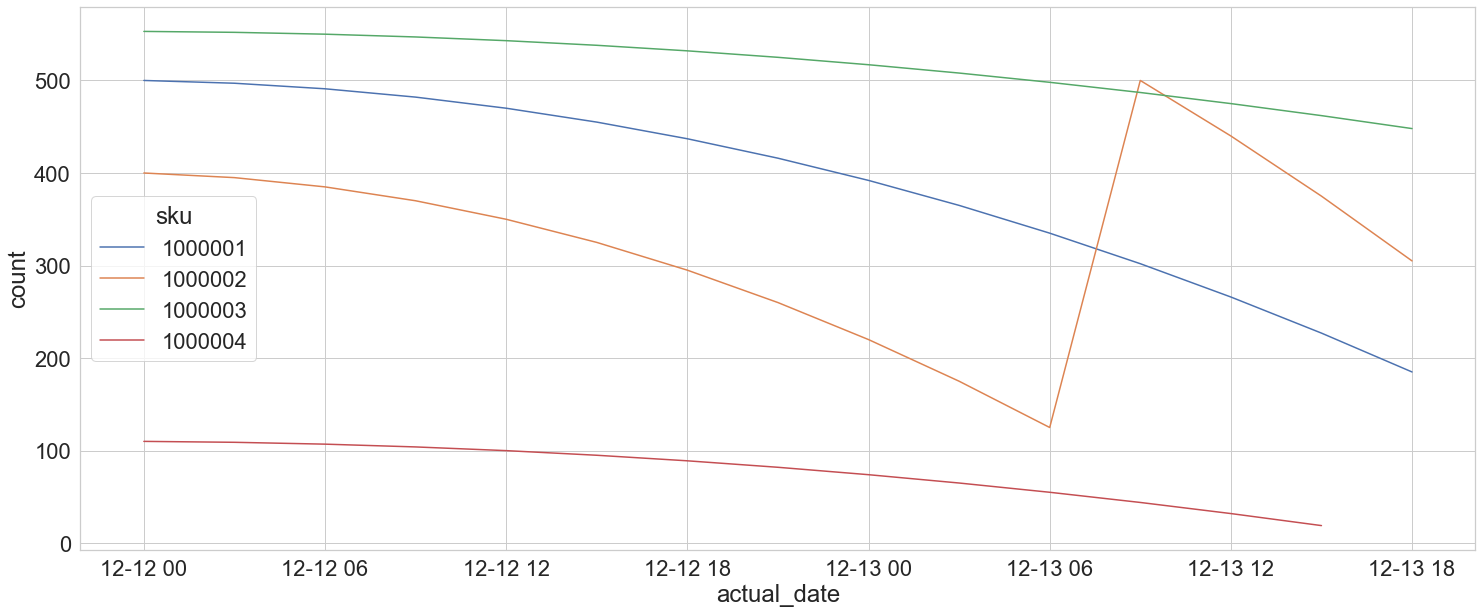

In [101]:
sns.lineplot(data=df_stock, x='actual_date', y='count', hue='sku')

Для подгонки линии будем использовать метод наименьших квадратов, используем для этого функцию линейной регрессии из **sklearn**

In [102]:
df_stock = df_stock.sort_values('actual_date', ascending=True)

In [103]:
grouped = df_stock.groupby('sku')

In [105]:
for sku, group in grouped:
    # переобразуем в формат timestamp
    x = group['actual_date'].apply(lambda x: x.timestamp()).values.reshape(-1, 1)
    
    y = group['count']
    
    # Применение модели
    predict = LinearRegression().fit(x, y)
    
    # Формула для нахождения дня когда товар закончится
    date_finished = pd.Timestamp.fromtimestamp((0 - predict.intercept_) / predict.coef_[0])
    
    print(f'sku {sku}: Товар закончится {date_finished}')

sku 1000001: Товар закончится 2022-12-15 04:44:00
sku 1000002: Товар закончится 2022-12-24 01:55:23.076923
sku 1000003: Товар закончится 2022-12-21 15:16:00
sku 1000004: Товар закончится 2022-12-14 08:42:51.428571


### Задание 
По данным из таблиц с динамикой цен товаров и с количеством оставшегося товара необходимо для первых трех товаров с самым наибольшим остатком на  2022-12-13 18:00:00 необходимо посчитать медианное значение цены за сегодняшний и вчерашний дни.


In [229]:
df = pd.concat([df_stock, df_costs])

In [230]:
df = df_costs.merge(df_stock, on='id')

In [231]:
df = df.drop(columns = ['actual_date_x', 'sku_y'])\
    .rename(columns={'sku_x': 'sku', 'actual_date_y': 'actual_date'})

In [249]:
df.head()

,id,sku,cost,count,actual_date
0,1,1000001,312.0,500.0,2022-12-12 00:00:00
1,2,1000002,1212.0,400.0,2022-12-12 00:00:00
2,3,1000003,472.0,553.0,2022-12-12 00:00:00
3,4,1000004,836.0,110.0,2022-12-12 00:00:00
4,5,1000001,348.0,497.0,2022-12-12 03:00:00


In [232]:
df.shape

(59, 5)

In [260]:
df.query("actual_date == @date")

,id,sku,cost,count,actual_date
56,57,1000001,324.0,185.0,2022-12-13 18:00:00
57,58,1000002,1260.0,305.0,2022-12-13 18:00:00
58,59,1000003,472.0,448.0,2022-12-13 18:00:00


In [244]:
date = datetime(2022,12,13,18,0,0)
date_2 = date - timedelta(days=1)

In [258]:
df.query('actual_date == @date or actual_date == @date_2 & sku != "1000004"')\
    .groupby('sku', as_index=False)\
    .agg({'cost': 'median'})\
    .rename(columns={'cost': 'median_cost'})

,sku,median_cost
0,1000001,360.0
1,1000002,1266.0
2,1000003,490.0
